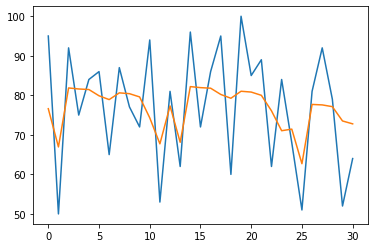

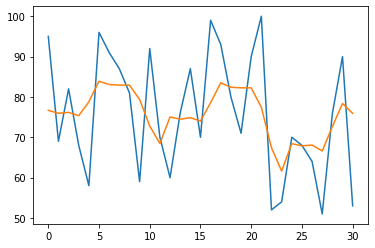

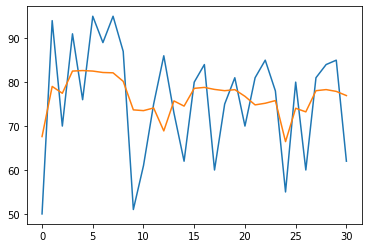

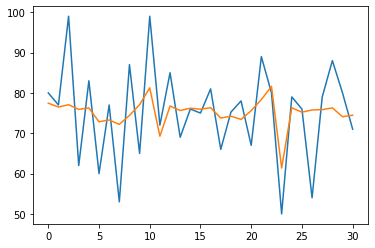

In [5]:
import numpy as np
import pandas as pd
import datetime as d
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = pd.read_excel('task1.xlsx')
df.columns = [col.lower() for col in df.columns]

# edit date
df.date = [d.date(date.year, date.day, date.month) for date in df.date]

# split year and month
df['year'] = [date.year for date in df.date]
df['month'] = [date.month for date in df.date]

# sorting df
df = df.sort_values(['category', 'year', 'month']).reset_index(drop=True)

# getting unique pizza categories
cats = df.category.unique()

# filling nan values
for cat in cats:
    df[df.category == cat] = df[df.category == cat].fillna(df[df.category == cat].mean())
    
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)

def next_date(year, month):
    if month < 12:
        return year, month+1
    else:
        return year+1, 1
    
dfs_new = pd.DataFrame(columns=['year', 'month', 'predicted', 'category'])
predicted = []
for cat in cats:
    X, y = df[df.category == cat][['year', 'month']], df[df.category == cat].sales
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    #regr.fit(X_train, y_train)
    regr.fit(X, y)
    predicted += list(regr.predict(X))
    
    l = len(y)
    plt.plot(range(l), y, predicted[-l:])
    plt.show()
    
    step = 5
    year = X.tail(1).year.iloc[0]
    month = X.tail(1).month.iloc[0]
    X_new = []
    for i in range(step):
        year, month = next_date(year, month)
        X_new.append([year, month])
    
    X_new = pd.DataFrame(X_new, columns=['year', 'month'])
    X_new['predicted'] = regr.predict(X_new)
    X_new['category'] = [cat]*step
    dfs_new = dfs_new.append(X_new, ignore_index = True)

df['predicted'] = predicted

In [6]:
df

,date,sales,category,year,month,predicted
0,2016-01-01,95.000000,Chicago Pizza,2016,1,76.615250
1,2016-02-01,50.000000,Chicago Pizza,2016,2,66.946075
2,2016-03-01,92.000000,Chicago Pizza,2016,3,81.862762
3,2016-04-01,75.000000,Chicago Pizza,2016,4,81.603581
4,2016-05-01,84.000000,Chicago Pizza,2016,5,81.463228
5,2016-06-01,86.000000,Chicago Pizza,2016,6,79.880215
6,2016-07-01,65.000000,Chicago Pizza,2016,7,78.915146
7,2016-08-01,87.000000,Chicago Pizza,2016,8,80.619569
8,2016-09-01,77.066667,Chicago Pizza,2016,9,80.415169
9,2016-10-01,72.000000,Chicago Pizza,2016,10,79.593640
